## How well does LIET capture Heatshock?
It is generally accepted/known that heatshock causes trailing of RNA pol transcription so that termination should be farther downstream than usual. However, this also means that LIET may consider the increased transcription as background rather than actual traanscription.

In [2]:
# Import required system
import sys
sys.path.append('/Users/hoto7260/Jacob_LIET2/LIET/liet')

# general
import matplotlib.pyplot as plt
import numpy as np
try:
    np.distutils.__config__.blas_opt_info = np.distutils.__config__.blas_ilp64_opt_info
except Exception:
    pass
import pandas as pd
from scipy.stats import pearsonr
import plotly.express as px

# my modules
from liet_res_class import FitParse
import plotting_funcs as pf
import analysis_funcs as af

# setting plotting paramaters
from pylab import rcParams
rcParams['figure.figsize'] = 20, 6
rcParams['font.size'] = 15
#plt.rcParams.update({'font.size': 22})

In [6]:
# Get applicable information
# Controls
#"/Users/hoto7260/LIET_cell_type/k562/output/SRR4454567.k562.1030.liet.log"
# k562 control 1a: SRR4454567
log_file = "/Users/hoto7260/LIET_cell_type/k562/output/SRR4454567.k562.1030.liet.log"
res_file = "/Users/hoto7260/LIET_cell_type/k562/output/SRR4454567.k562.1030.liet"
k562_SR67 = pf.FitParse(res_file=res_file, log_file=log_file)
k562_SR67.df.name = "k562 Control 1"
# k562 control 1b: SRR4454568
log_file = "/Users/hoto7260/LIET_cell_type/k562/output/SRR4454568.k562.1030.liet.log"
res_file = "/Users/hoto7260/LIET_cell_type/k562/output/SRR4454568.k562.1030.liet"
k562_SR68 = pf.FitParse(res_file=res_file, log_file=log_file)
k562_SR68.df.name = "k562 Control 2"
# HeatShock
# k562 heatshock 1a: SRR4454569
log_file = "/Users/hoto7260/LIET_cell_type/k562/output/SRR4454569.k562.1030.liet.log"
res_file = "/Users/hoto7260/LIET_cell_type/k562/output/SRR4454569.k562.1030.liet"
k562_SR69 = pf.FitParse(res_file=res_file, log_file=log_file)
k562_SR69.df.name = "k562 Heatshock 1"
# k562 heatshock 1a: SRR4454569
log_file = "/Users/hoto7260/LIET_cell_type/k562/output/SRR4454570.k562.1030.liet.log"
res_file = "/Users/hoto7260/LIET_cell_type/k562/output/SRR4454570.k562.1030.liet"
k562_SR70 = pf.FitParse(res_file=res_file, log_file=log_file)
k562_SR70.df.name = "k562 Heatshock 2"
print(k562_SR70.df.columns)

Index(['chrom', 'start', 'stop', 'strand', 'gene', 'mL_mean', 'mL_stdev',
       'sL_mean', 'sL_stdev', 'tI_mean', 'tI_stdev', 'mT_mean', 'mT_stdev',
       'sT_mean', 'sT_stdev', 'w_LI_mean', 'w_LI_stdev', 'w_E_mean',
       'w_E_stdev', 'w_T_mean', 'w_T_stdev', 'w_B_mean', 'w_B_stdev',
       'mL_a_mean', 'mL_a_stdev', 'sL_a_mean', 'sL_a_stdev', 'w_aLI_mean',
       'w_aLI_stdev', 'w_aB_mean', 'w_aB_stdev', 'pos_cov', 'neg_cov',
       'elbo_lrange', 'elbo_urange', 'fit_time_min'],
      dtype='object')


CHECK LINE: ['ZBTB8B: model error']
CHECK LINE: ['RAB3B: model error']
CHECK LINE: ['HRNR: model error']
CHECK LINE: ['LAMC1: model error']
CHECK LINE: ['ZNF281: model error']
CHECK LINE: ['BTG2: model error']
CHECK LINE: ['NUCKS1: model error']
CHECK LINE: ['SCCPDH: model error']
CHECK LINE: ['ITGA8: model error']
CHECK LINE: ['BMS1: model error']
CHECK LINE: ['TET1: model error']
CHECK LINE: ['FGFBP3: model error']
CHECK LINE: ['SCD: model error']


### 2. Filter genes with w_B>0.6
This will help assess if the heat shock model mistook transcription as background, since one would expect a stark decrease in genes.

In [7]:
# see how the # of genes covered compare between before filtering
print('Controls: ',len(k562_SR67.df.index),len(k562_SR68.df.index))
print('Heat Shock: ',len(k562_SR69.df.index),len(k562_SR70.df.index))

Controls:  201 201
Heat Shock:  201 187


In [8]:
#controls
df_list = [k562_SR67.df, k562_SR68.df]
[k562_SR67_f_df, k562_SR68_f_df] = af.filter_dfs(df_list, col='w_B_mean',
                                                                   value=0.6,
                                                                   comparison='<')
#Heat shock
df_list = [k562_SR69.df, k562_SR70.df]
[k562_SR69_f_df, k562_SR70_f_df] = af.filter_dfs(df_list, col='w_B_mean',
                                                                   value=0.6,
                                                                   comparison='<')


In [9]:
# see how the # of genes covered compare between before filtering
print('Controls: ',len(k562_SR67_f_df.index),len(k562_SR68_f_df.index))
print('Heat Shock: ',len(k562_SR69_f_df.index),len(k562_SR70_f_df.index))

Controls:  200 200
Heat Shock:  200 185


Both sets lost around 20 genes, indicating that the model did not mistake the increased tranascription as background.

### 3. Get genes 30kb or below in length
Since these cells faced heatshock for 30 min, it might not have been enough time for all the genes to have been transcribed. Therefore, with a safe bet, we are going to figure out which genes fall within this range.

In [6]:
# filter one dataframe (going to merge anyways so just picked one with lowest) to only have genes >30kb
k562_SR70_f2_df = k562_SR70_f_df[abs(k562_SR70_f_df['start']-k562_SR70_f_df['stop']) >30000]
print(len(k562_SR70_f2_df.index))

53


In [10]:
def df_merger(df1, df2, name):
    df1 = df1.filter(items = df2.index, axis=0)
    df2 = df2.filter(items = df1.index, axis=0)
    print("After merging " + name + ", # genes= " + str(len(df1)))
    return df1, df2

def df_combiner(col_list, df_list, name_list):
    comb_df = df_list[0]['gene']
    comb_df = pd.DataFrame(comb_df)
    comb_df['strand'] = df_list[0]['strand']
    for y_value in col_list:
        count = 0
        for df, name in zip(df_list, name_list):
            if count != 0:
                # use only same genes
                comb_df, df = df_merger(comb_df, df, name)
            comb_df[str(name)+'_'+str(y_value)] = df[y_value]
            # increase count
            count += 1
    return comb_df

# combine all dataframes into one massive one
col_list = ['mT_mean', 'mT_stdev', 'mL_mean', 'mL_stdev', 'pos_cov', 'neg_cov', 'w_B_mean']
df_list = [k562_SR67_f_df, k562_SR68_f_df,
          k562_SR69_f_df, k562_SR70_f_df]
name_list = ['Control Vih 1a', 'Control Vih 1b',
            'Heatshock Vih 2a', 'Heatshock Vih 2b']
HS30_full_df = df_combiner(col_list, df_list, name_list)
print(HS30_full_df.columns)

After merging Control Vih 1b, # genes= 200
After merging Heatshock Vih 2a, # genes= 199
After merging Heatshock Vih 2b, # genes= 183
After merging Control Vih 1b, # genes= 183
After merging Heatshock Vih 2a, # genes= 183
After merging Heatshock Vih 2b, # genes= 183
After merging Control Vih 1b, # genes= 183
After merging Heatshock Vih 2a, # genes= 183
After merging Heatshock Vih 2b, # genes= 183
After merging Control Vih 1b, # genes= 183
After merging Heatshock Vih 2a, # genes= 183
After merging Heatshock Vih 2b, # genes= 183
After merging Control Vih 1b, # genes= 183
After merging Heatshock Vih 2a, # genes= 183
After merging Heatshock Vih 2b, # genes= 183
After merging Control Vih 1b, # genes= 183
After merging Heatshock Vih 2a, # genes= 183
After merging Heatshock Vih 2b, # genes= 183
After merging Control Vih 1b, # genes= 183
After merging Heatshock Vih 2a, # genes= 183
After merging Heatshock Vih 2b, # genes= 183
Index(['gene', 'strand', 'Control Vih 1a_mT_mean', 'Control Vih 1b_mT

In [16]:
fig = px.scatter(HS30_full_df, x= 'Control Vih 1a_mT_mean', y='Heatshock Vih 2a_mT_mean', 
                hover_data=['Control Vih 1a_pos_cov', 'gene', 'strand',
                            'Control Vih 1b_pos_cov','Heatshock Vih 2a_pos_cov', 
                            'Heatshock Vih 2b_pos_cov', 'Control Vih 1b_mT_mean', 
                           'Heatshock Vih 2b_mT_mean'])
fig.show()

### 4. Plot all shared genes for 30 minutes

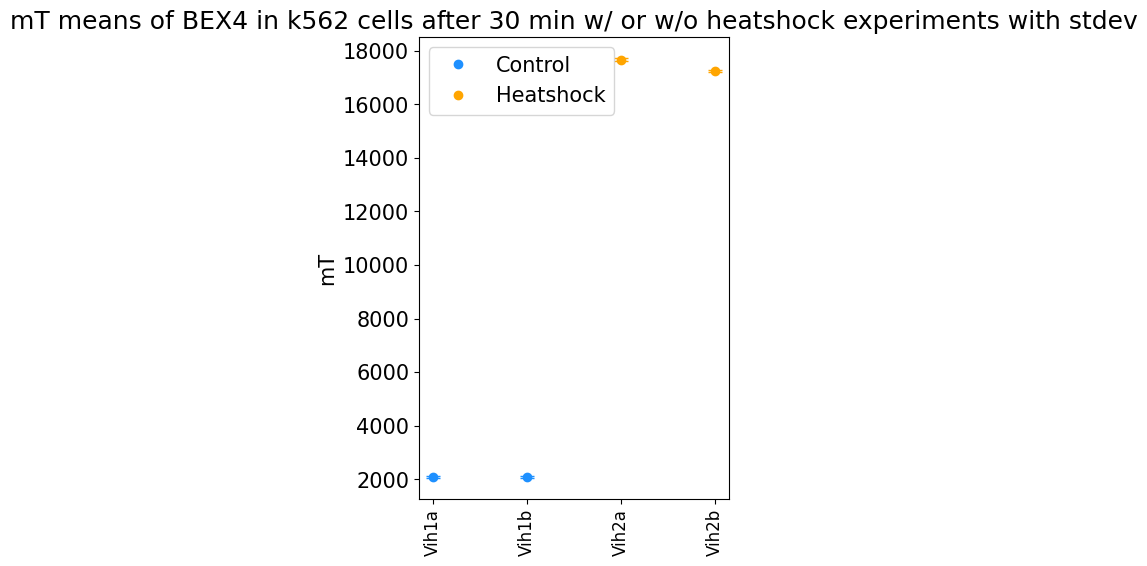

In [11]:
cats = ['Control', 'Heatshock']
rcParams['figure.figsize'] = 4, 6
rcParams['font.size'] = 15
pf.meanerror_exp_plotter(full_df=HS30_full_df, gene='BEX4', par='mT', cats=cats, 
                          group_name='k562 cells after 30 min w/ or w/o heatshock', expline=False)

It seems that 30 minutes was not enough time for any diffeerence in transcription to be observed based on the LIET model. I can try again with 1 hr, 1 hr30min, and 30 h. The paper, however, notes that there might be genes with elongation that goes after as they purposely only looked at genes that didn't. Therefore, I will see if I can find those genes.

#### Combine all into one dataaframe for comparative analysis

In [20]:
## Combine all with only filtering of the w_B_mean
col_list = ['mT_mean', 'mT_stdev', 'mL_mean', 'mL_stdev', 'pos_cov', 'neg_cov', 'w_B_mean']
df_list = [k562_SR67_f_df, k562_SR68_f_df,
          k562_SR69_f_df, k562_SR70_f_df]
name_list = ['Control Vih 1a', 'Control Vih 1b',
            'Heatshock Vih 2a', 'Heatshock Vih 2b']
HS30_full_df = df_combiner(col_list, df_list, name_list)
print(HS30_full_df.columns)

After merging Control Vih 1b, # genes= 200
After merging Heatshock Vih 2a, # genes= 199
After merging Heatshock Vih 2b, # genes= 183
After merging Control Vih 1b, # genes= 183
After merging Heatshock Vih 2a, # genes= 183
After merging Heatshock Vih 2b, # genes= 183
After merging Control Vih 1b, # genes= 183
After merging Heatshock Vih 2a, # genes= 183
After merging Heatshock Vih 2b, # genes= 183
After merging Control Vih 1b, # genes= 183
After merging Heatshock Vih 2a, # genes= 183
After merging Heatshock Vih 2b, # genes= 183
After merging Control Vih 1b, # genes= 183
After merging Heatshock Vih 2a, # genes= 183
After merging Heatshock Vih 2b, # genes= 183
After merging Control Vih 1b, # genes= 183
After merging Heatshock Vih 2a, # genes= 183
After merging Heatshock Vih 2b, # genes= 183
After merging Control Vih 1b, # genes= 183
After merging Heatshock Vih 2a, # genes= 183
After merging Heatshock Vih 2b, # genes= 183
Index(['gene', 'strand', 'Control Vih 1a_mT_mean', 'Control Vih 1b_mT

In [29]:
### Filter for genes with significant coverage
# split between strands
HS30_full_n_df = HS30_full_df[HS30_full_df['strand']==-1]
HS30_full_p_df = HS30_full_df[HS30_full_df['strand']==1]
# get average cov for each
HS30_full_n_df['neg_cov'] = (HS30_full_n_df['Control Vih 1a_neg_cov'] + 
                            HS30_full_n_df['Control Vih 1b_neg_cov'] +
                            HS30_full_n_df['Heatshock Vih 2a_neg_cov'] + 
                            HS30_full_n_df['Heatshock Vih 2b_neg_cov']) / 4
HS30_full_p_df['pos_cov'] = (HS30_full_p_df['Control Vih 1a_pos_cov'] + 
                            HS30_full_p_df['Control Vih 1b_pos_cov'] +
                            HS30_full_p_df['Heatshock Vih 2a_pos_cov'] + 
                            HS30_full_p_df['Heatshock Vih 2b_pos_cov']) / 4
# filter where coverage is higher than 100
HS30_full_n_f_df = HS30_full_n_df[HS30_full_n_df['neg_cov']<-100]
HS30_full_p_f_df = HS30_full_p_df[HS30_full_p_df['pos_cov']>100]

/tmp/ipykernel_43178/5972785.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_43178/5972785.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### 4. See what basic scatterplot matrix looks like

In [21]:
dimensions = []
for i in HS30_full_df.columns:
    if "mT_mean" in i:
        dimensions.append(i)
fig = px.scatter_matrix(HS30_full_df, dimensions = dimensions, color="strand")
fig.show()

/Users/hoto7260/miniconda3/envs/secondenv/lib/python3.9/site-packages/plotly/express/_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [18]:
#Filter to only have ones with high enough coverage
print(HS30_full_df.columns)

Index(['gene', 'Control Vih 1a_mT_mean', 'Control Vih 1b_mT_mean',
       'Heatshock Vih 2a_mT_mean', 'Heatshock Vih 2b_mT_mean',
       'Control Vih 1a_mT_stdev', 'Control Vih 1b_mT_stdev',
       'Heatshock Vih 2a_mT_stdev', 'Heatshock Vih 2b_mT_stdev',
       'Control Vih 1a_mL_mean', 'Control Vih 1b_mL_mean',
       'Heatshock Vih 2a_mL_mean', 'Heatshock Vih 2b_mL_mean',
       'Control Vih 1a_mL_stdev', 'Control Vih 1b_mL_stdev',
       'Heatshock Vih 2a_mL_stdev', 'Heatshock Vih 2b_mL_stdev',
       'Control Vih 1a_pos_cov', 'Control Vih 1b_pos_cov',
       'Heatshock Vih 2a_pos_cov', 'Heatshock Vih 2b_pos_cov',
       'Control Vih 1a_neg_cov', 'Control Vih 1b_neg_cov',
       'Heatshock Vih 2a_neg_cov', 'Heatshock Vih 2b_neg_cov',
       'Control Vih 1a_w_B_mean', 'Control Vih 1b_w_B_mean',
       'Heatshock Vih 2a_w_B_mean', 'Heatshock Vih 2b_w_B_mean'],
      dtype='object')


#### 5. See if can get genes with higher tranascription

In [15]:
HShigher_df = HS30_full_df[(HS30_full_df['Heatshock Vih 2a_mT_mean']-HS30_full_df['Control Vih 1a_mT_mean'])>0]
print(len(HShigher_df.index))
HShigher_df = HShigher_df[(HShigher_df['Heatshock Vih 2b_mT_mean']-HShigher_df['Control Vih 1b_mT_mean'])>0]
Chigher_df = HS30_full_df[(HS30_full_df['Heatshock Vih 2a_mT_mean']-HS30_full_df['Control Vih 1a_mT_mean'])<0]
print(len(Chigher_df.index))
Chigher_df = Chigher_df[(Chigher_df['Heatshock Vih 2b_mT_mean']-Chigher_df['Control Vih 1b_mT_mean'])<0]
print(len(HShigher_df.index))
print(len(Chigher_df.index))
print(len(HS30_full_df.index))

101
82
65
48
183


In [31]:
# coverage filtered
HShigher_p_df = HS30_full_p_f_df[(HS30_full_p_f_df['Heatshock Vih 2a_mT_mean']-HS30_full_p_f_df['Control Vih 1a_mT_mean'])>0]
print(len(HShigher_p_df.index))
HShigher_p_df = HShigher_p_df[(HShigher_p_df['Heatshock Vih 2b_mT_mean']-HShigher_p_df['Control Vih 1b_mT_mean'])>0]
Chigher_p_df = HS30_full_p_f_df[(HS30_full_p_f_df['Heatshock Vih 2a_mT_mean']-HS30_full_p_f_df['Control Vih 1a_mT_mean'])<0]
print(len(Chigher_p_df.index))
Chigher_p_df  = Chigher_p_df[(Chigher_p_df['Heatshock Vih 2b_mT_mean']-Chigher_p_df['Control Vih 1b_mT_mean'])<0]
print(len(HShigher_p_df.index))
print(len(Chigher_p_df.index))
print(len(HS30_full_p_f_df.index))

37
22
29
12
59


/Users/hoto7260/Hope_LIET/H_LIET/liet/plotting/plotting_funcs.py:93: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



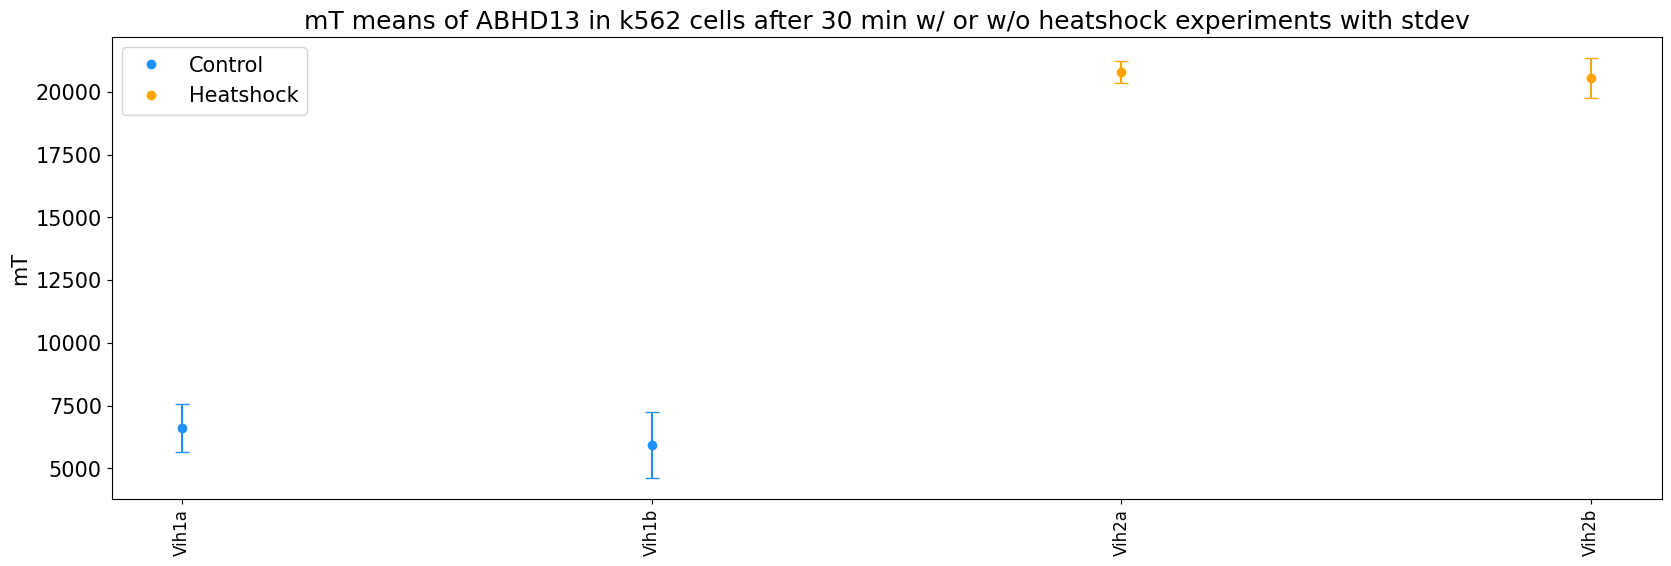

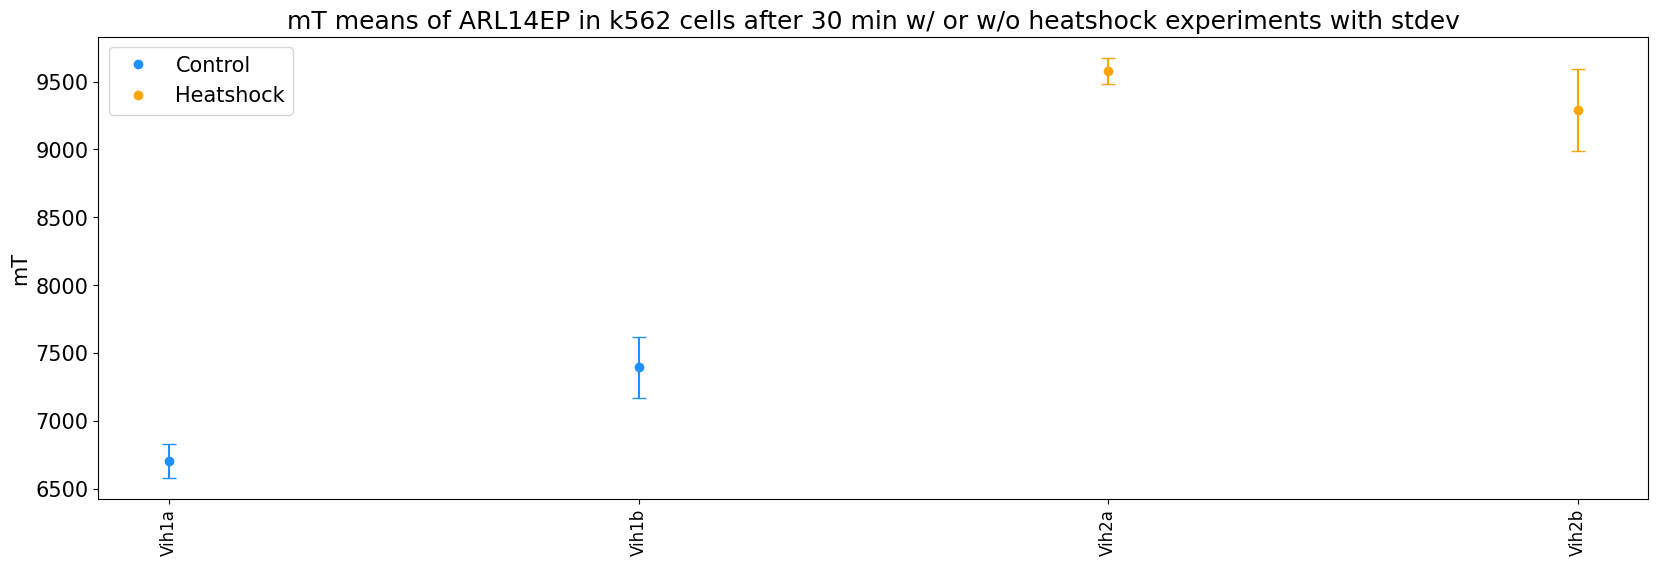

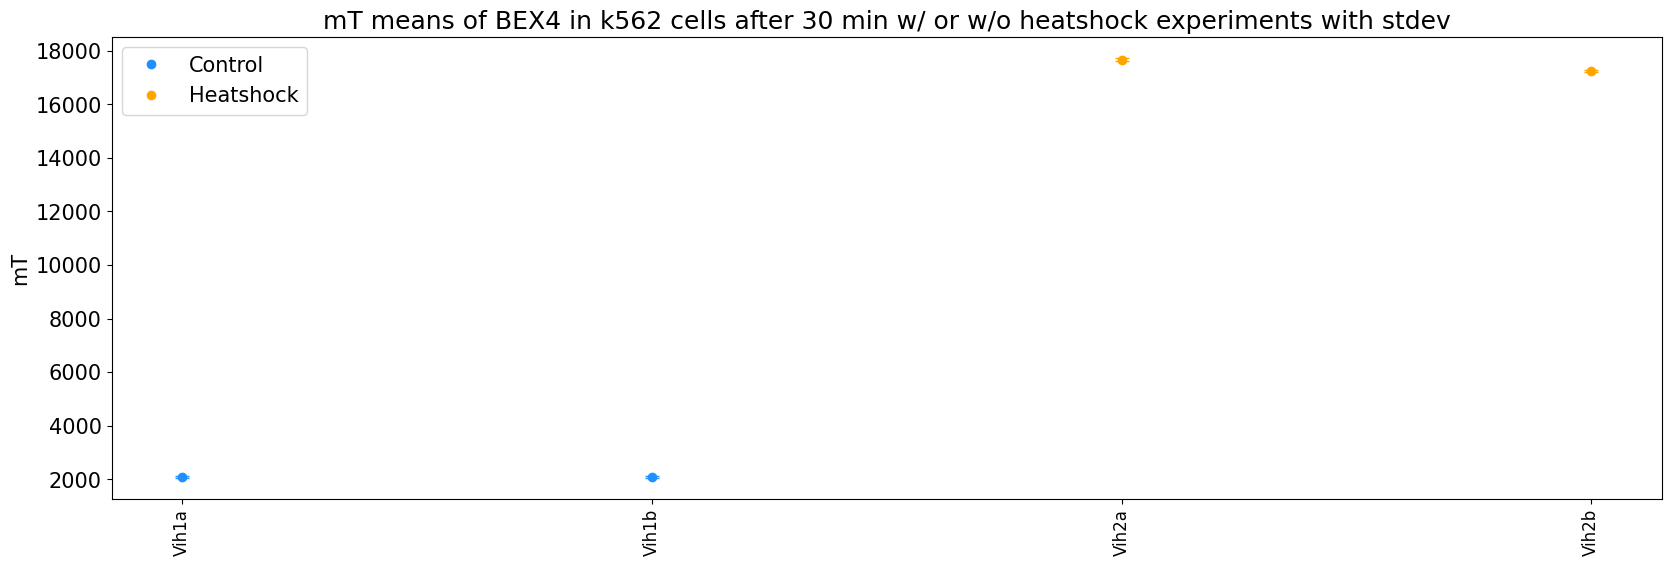

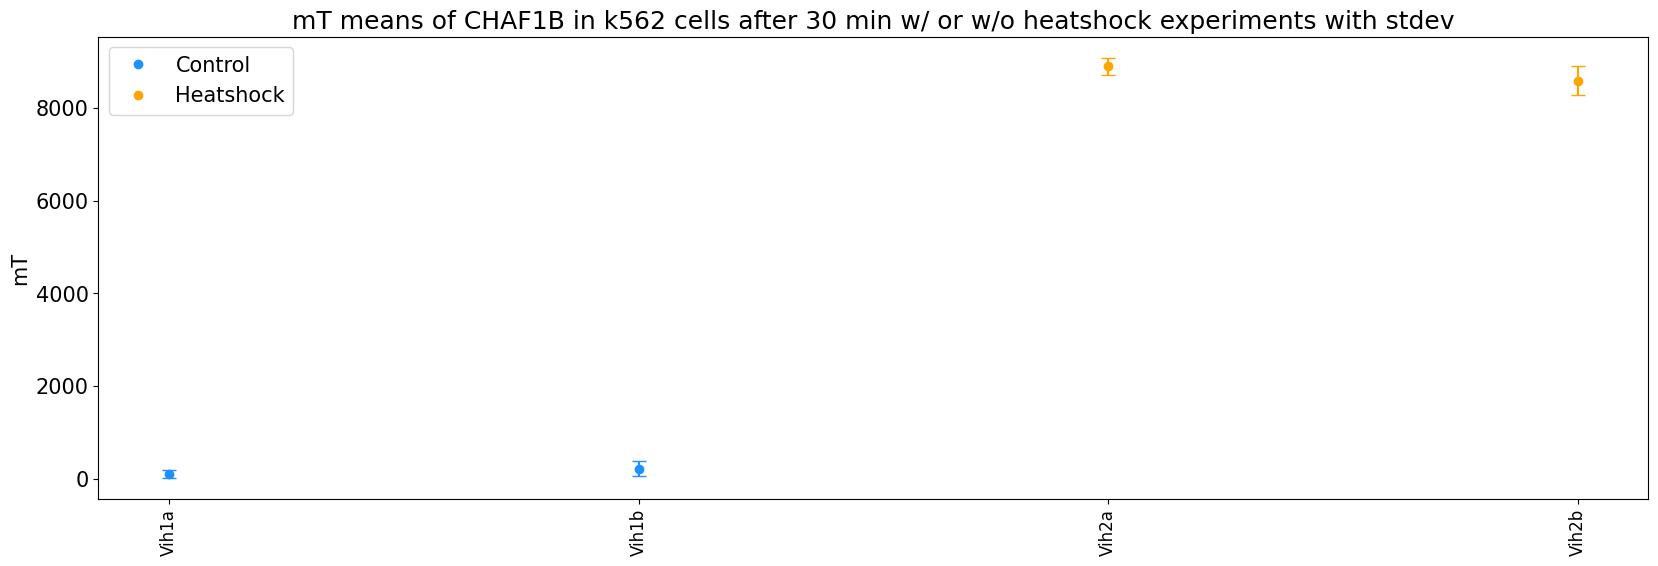

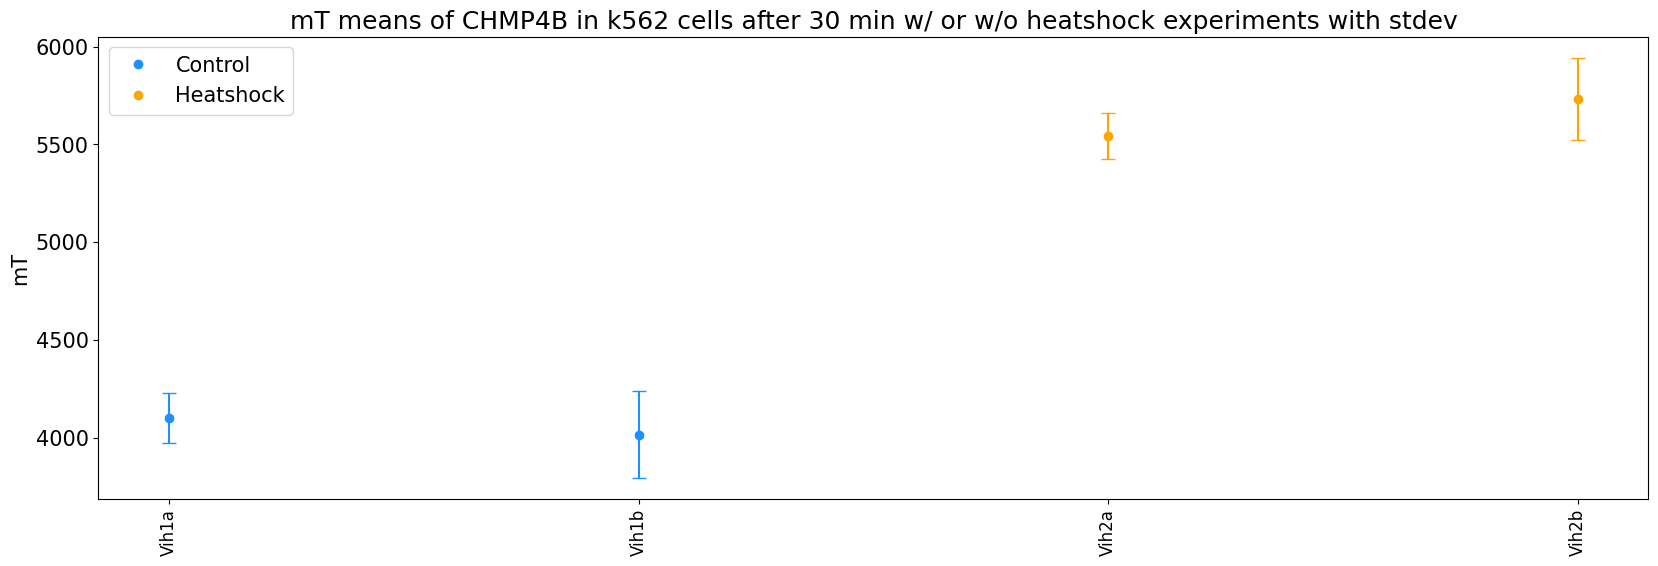

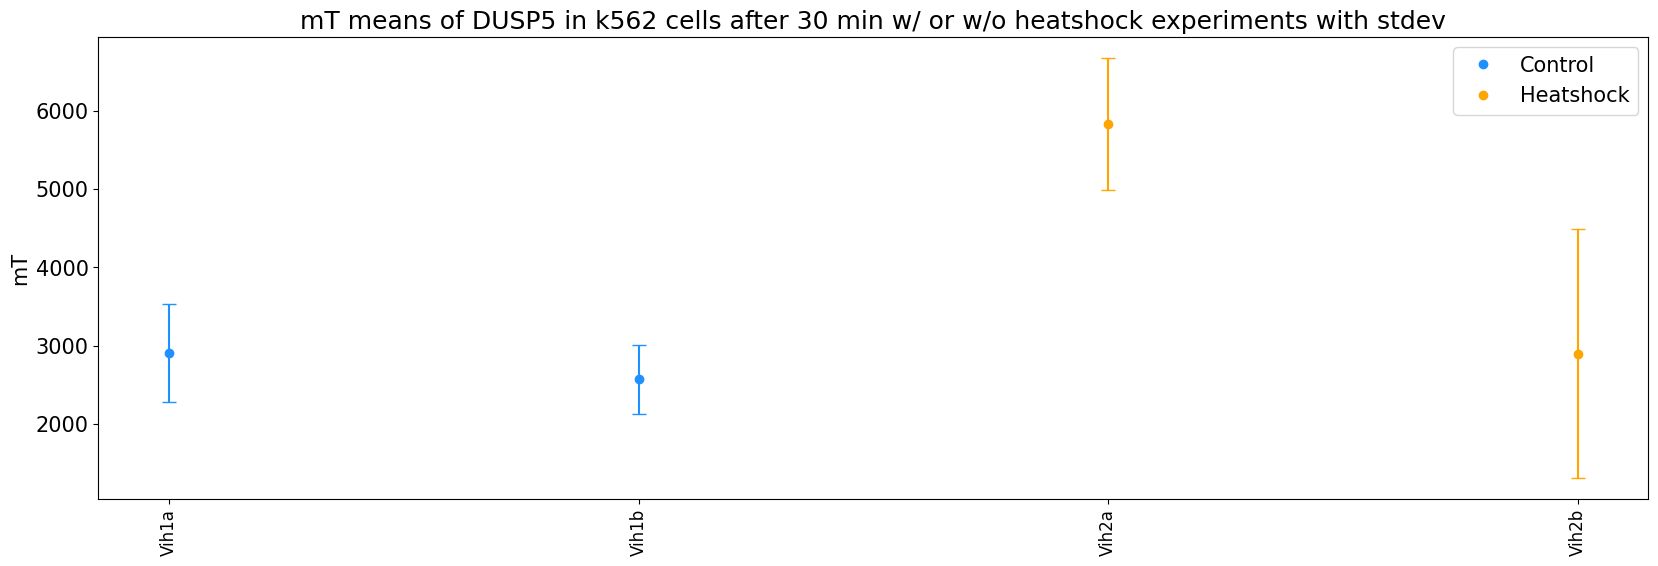

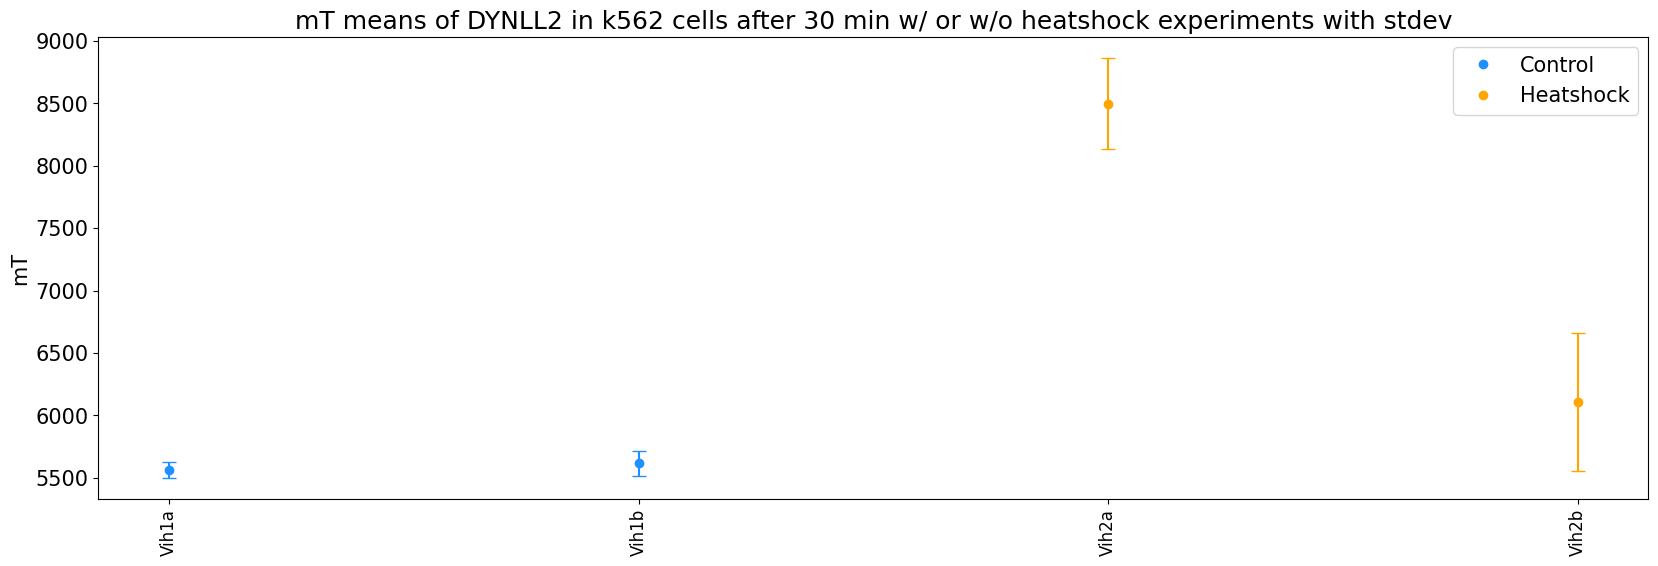

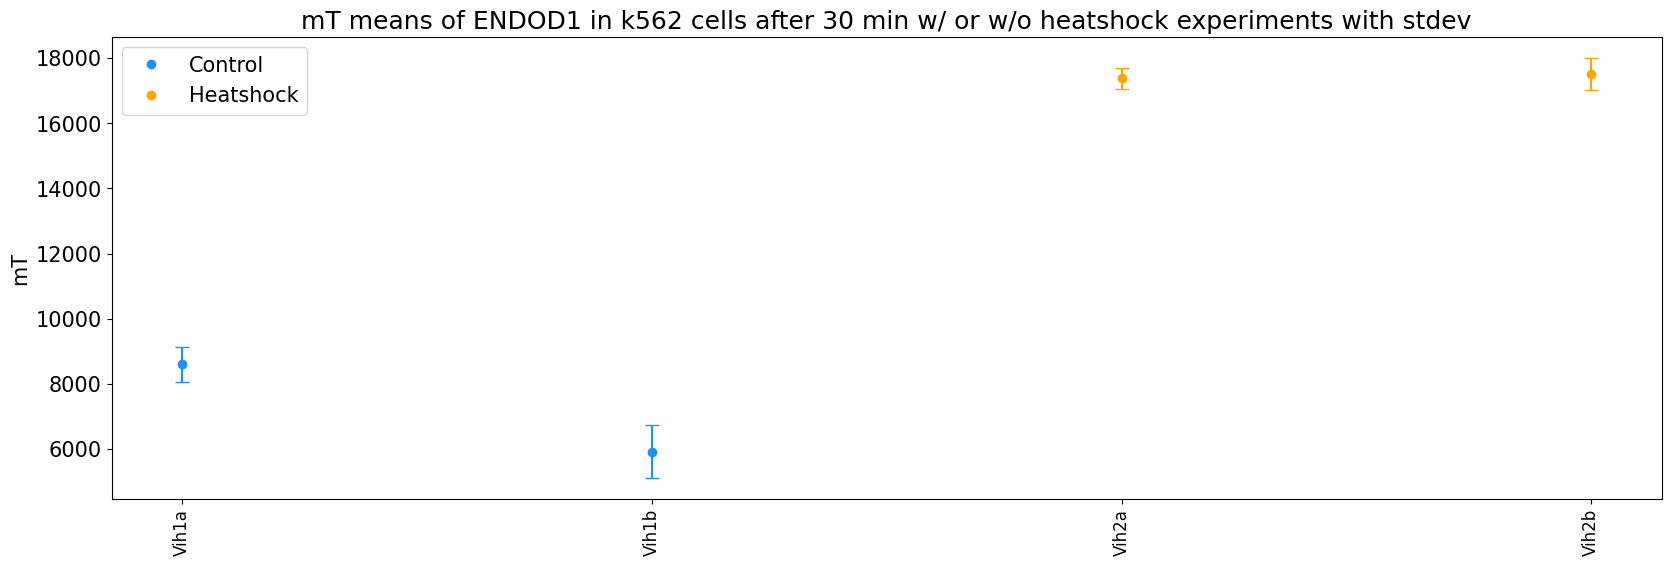

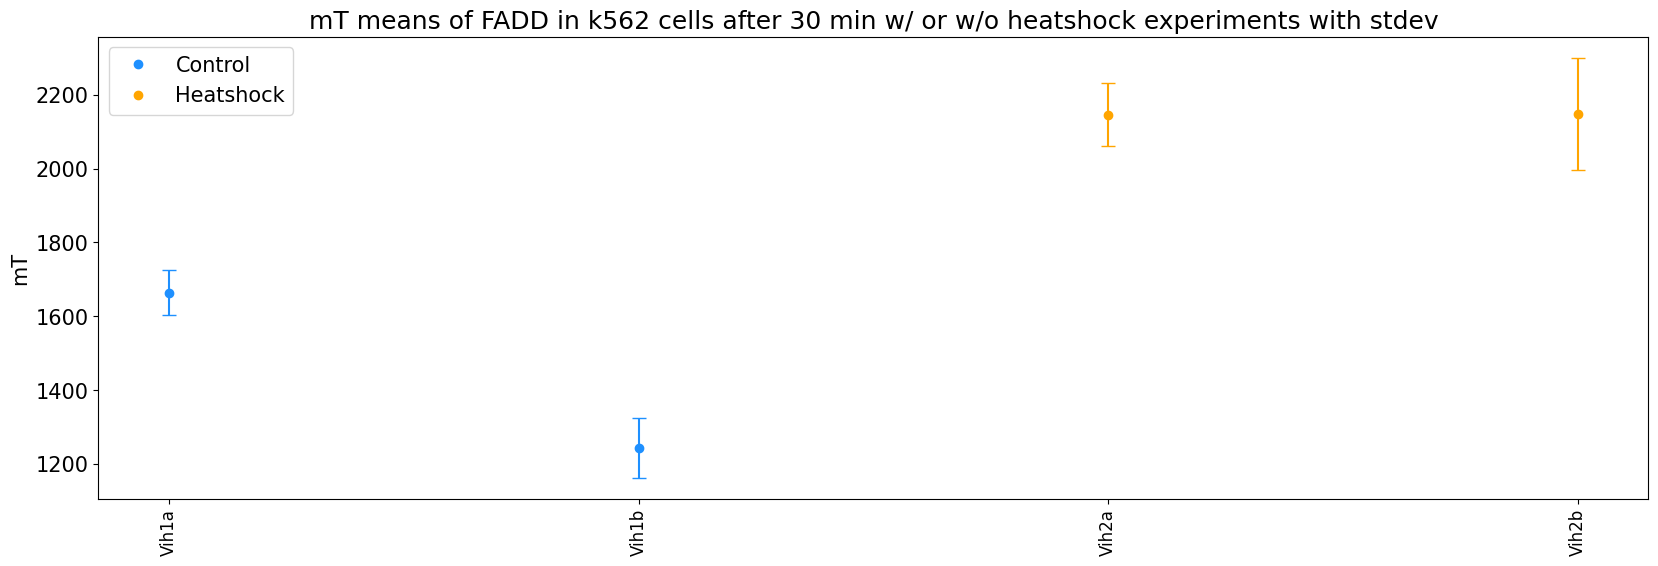

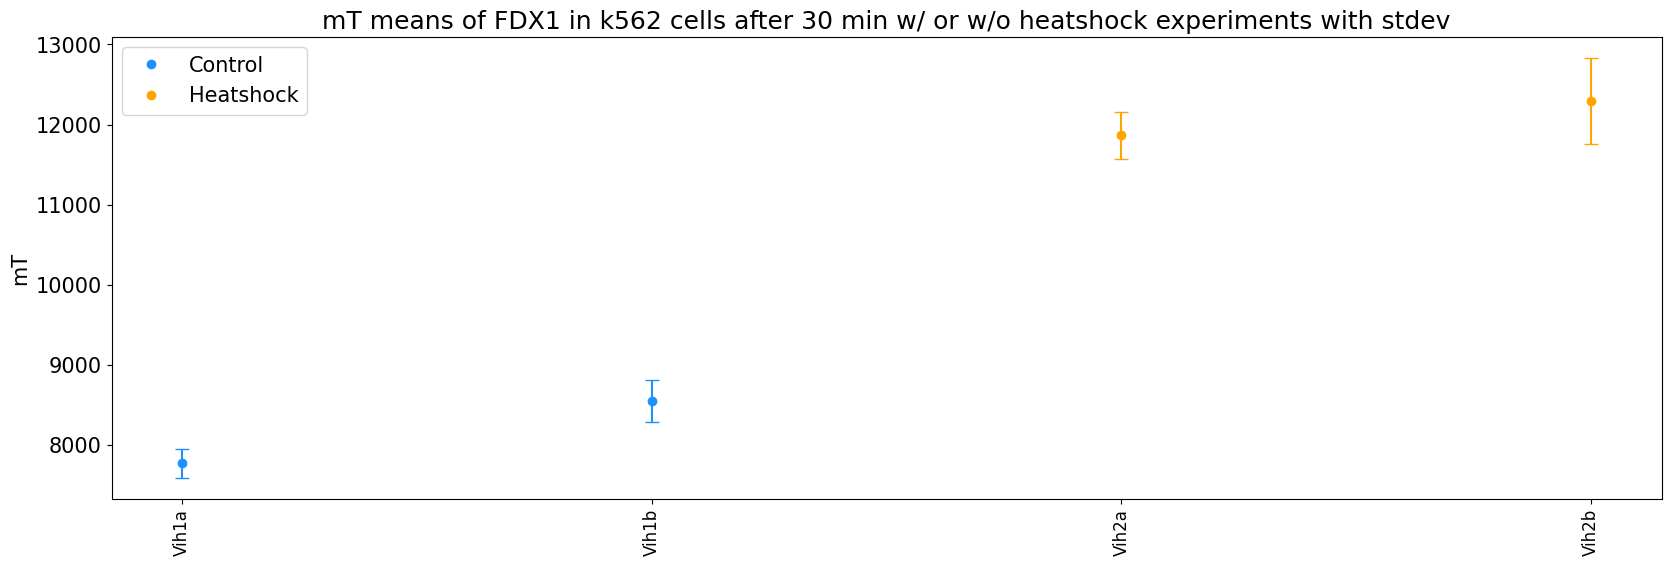

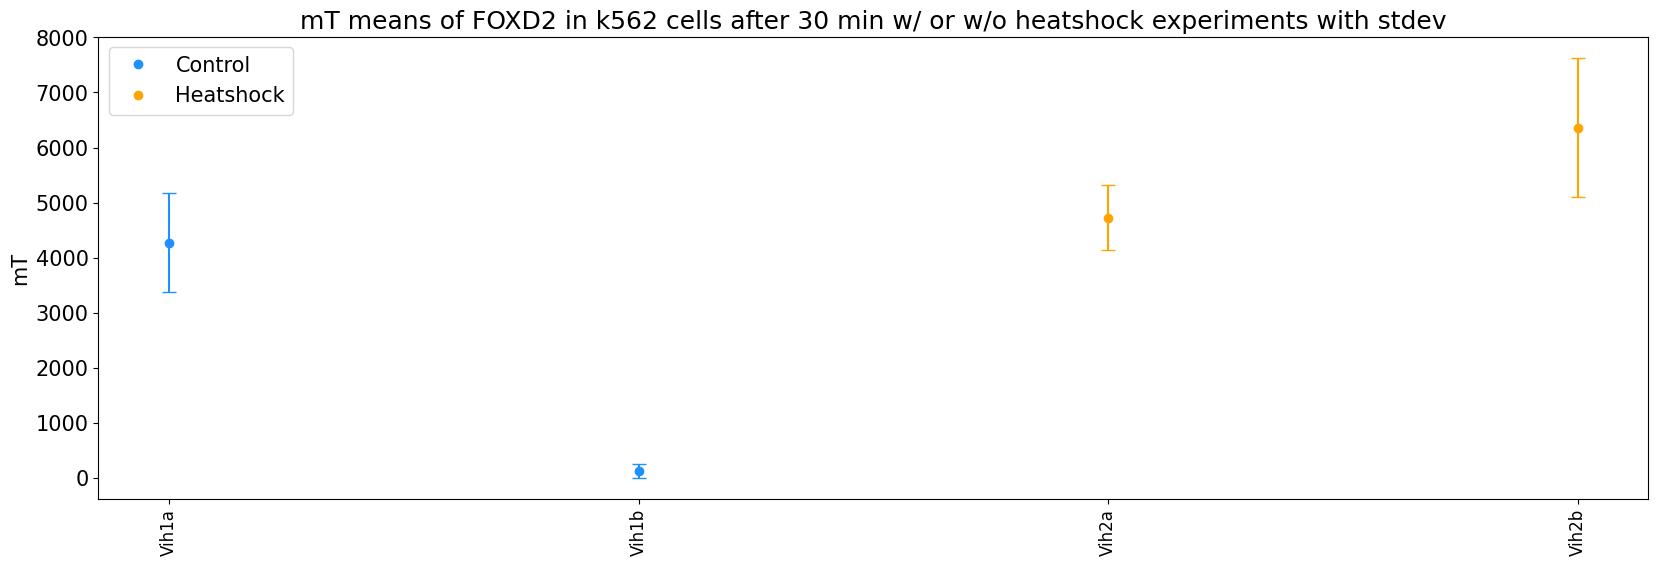

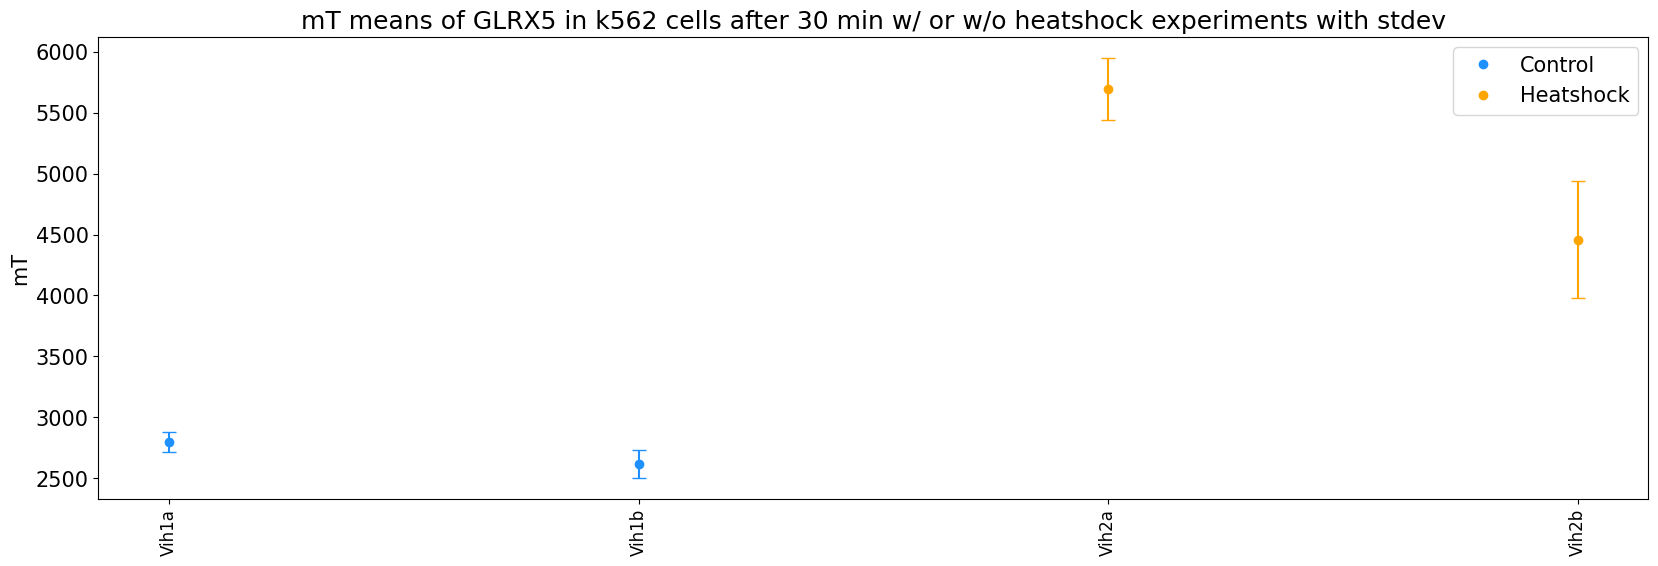

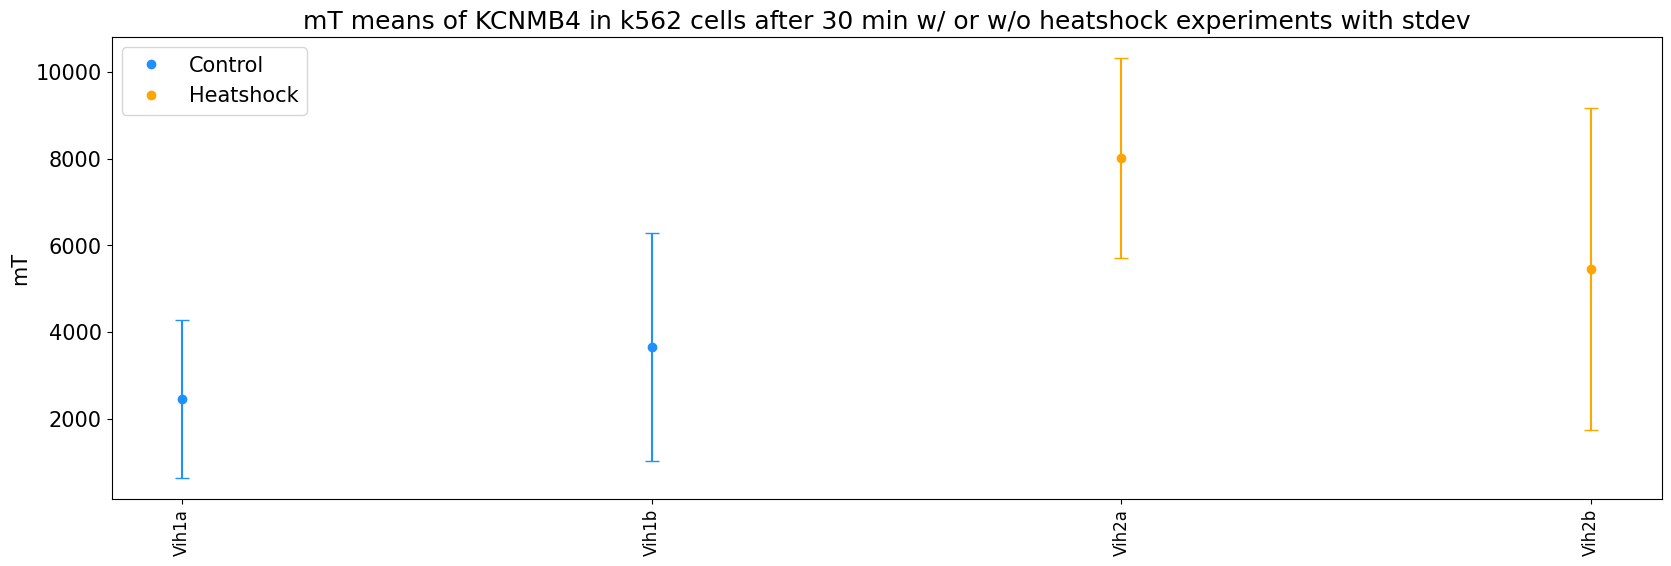

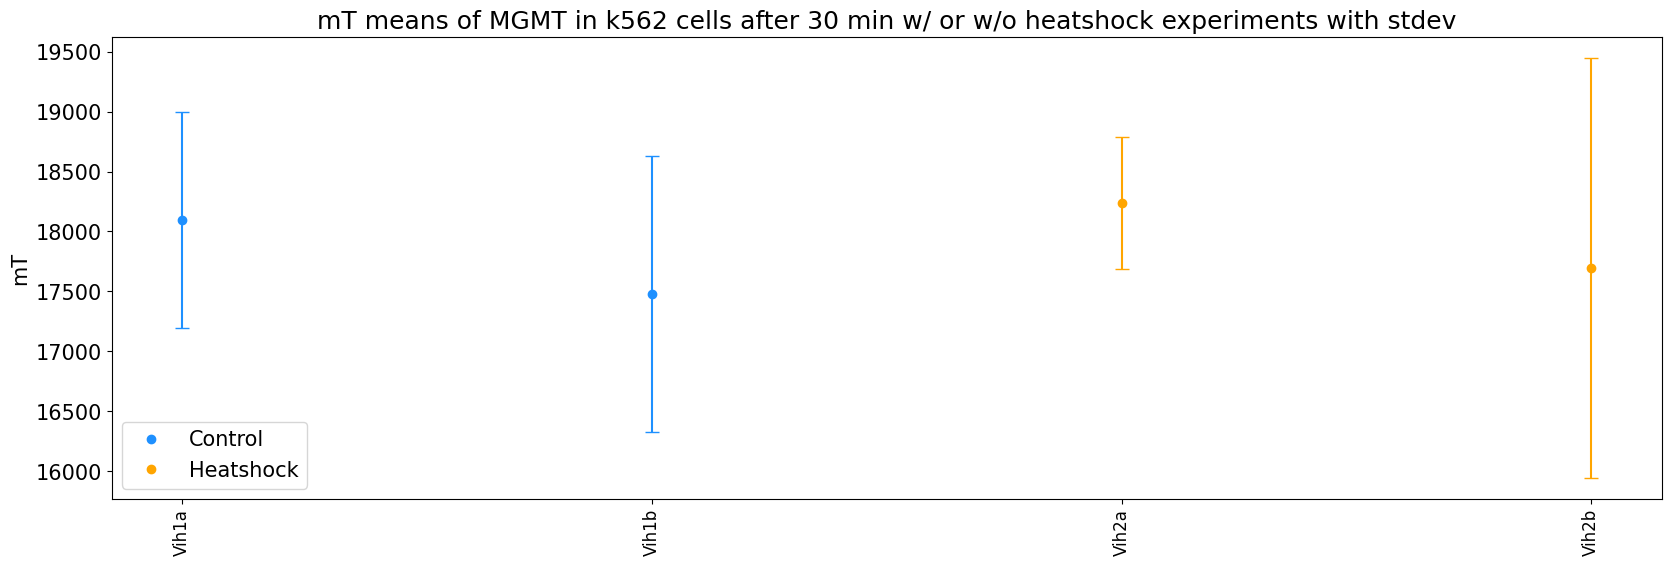

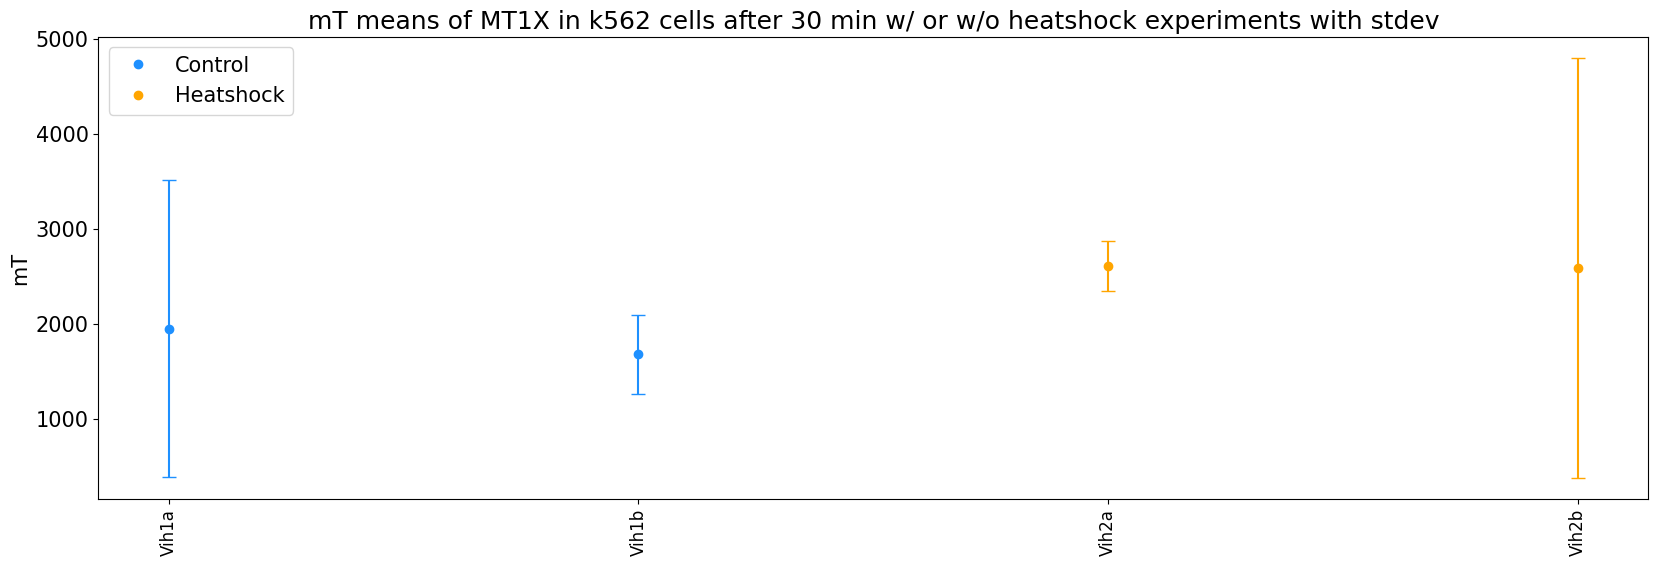

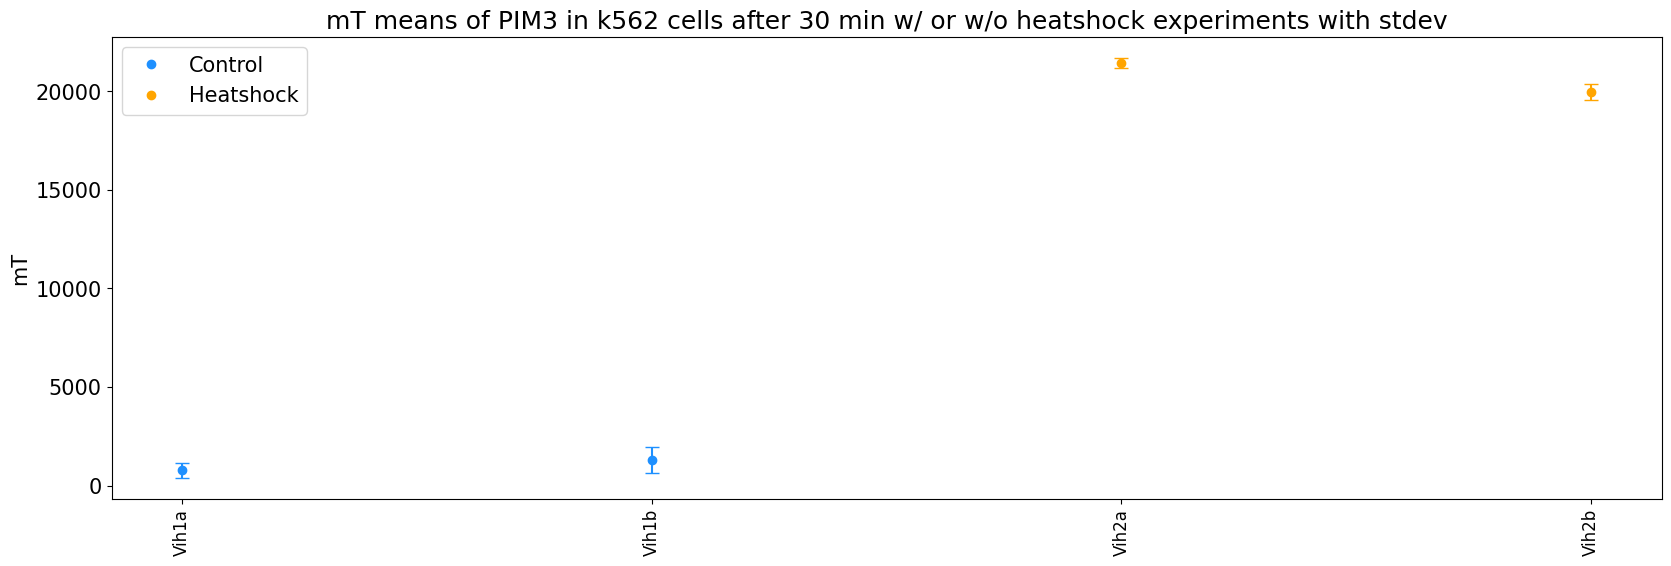

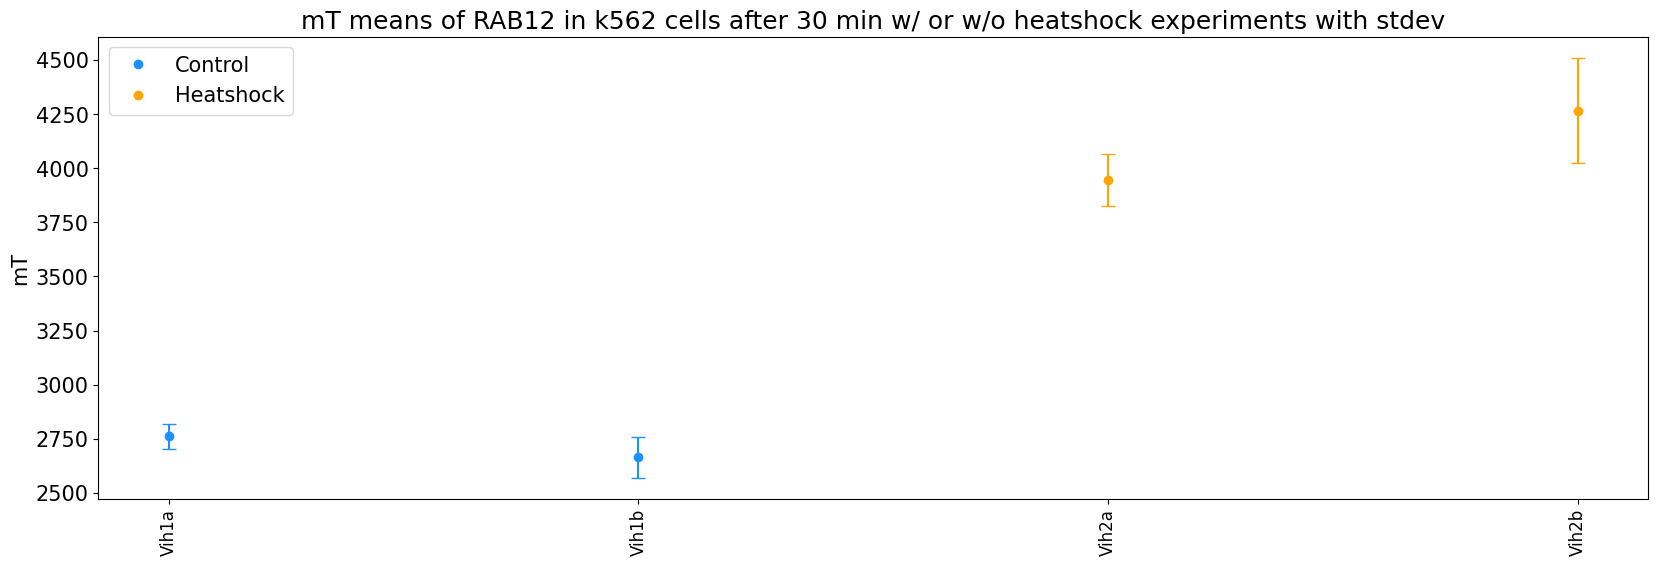

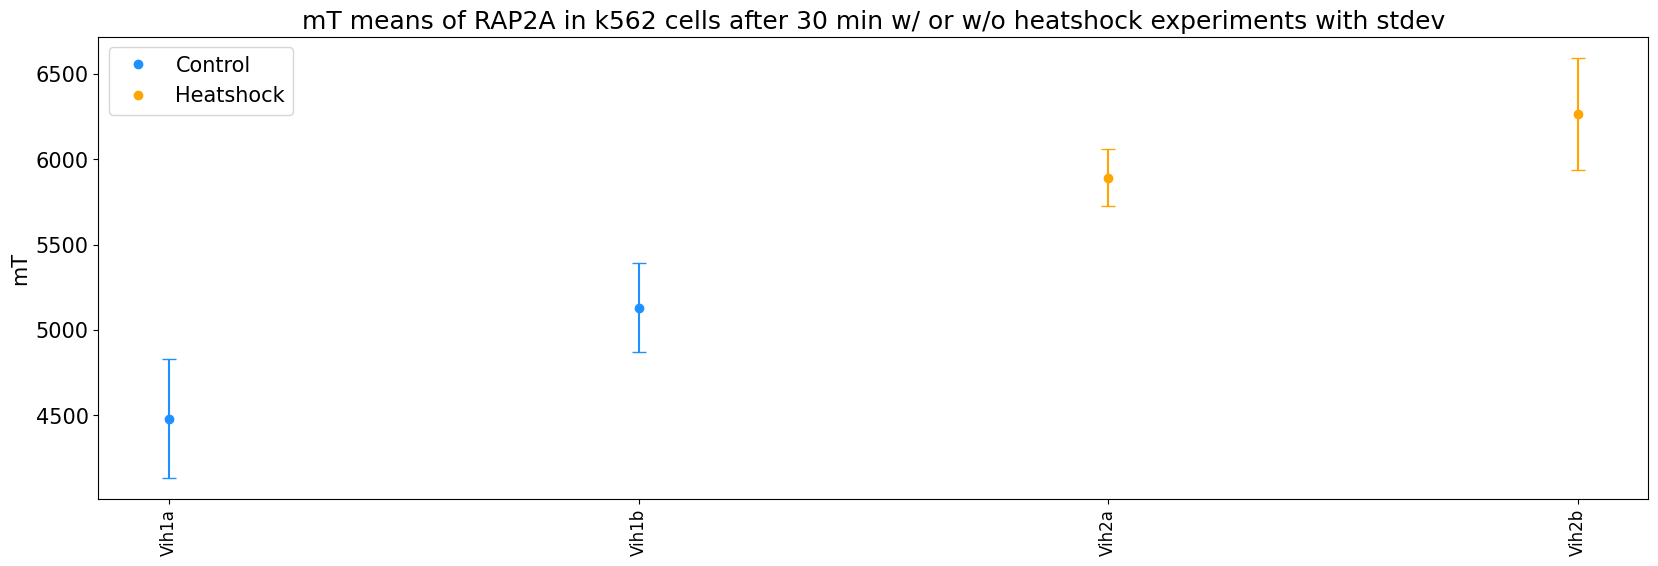

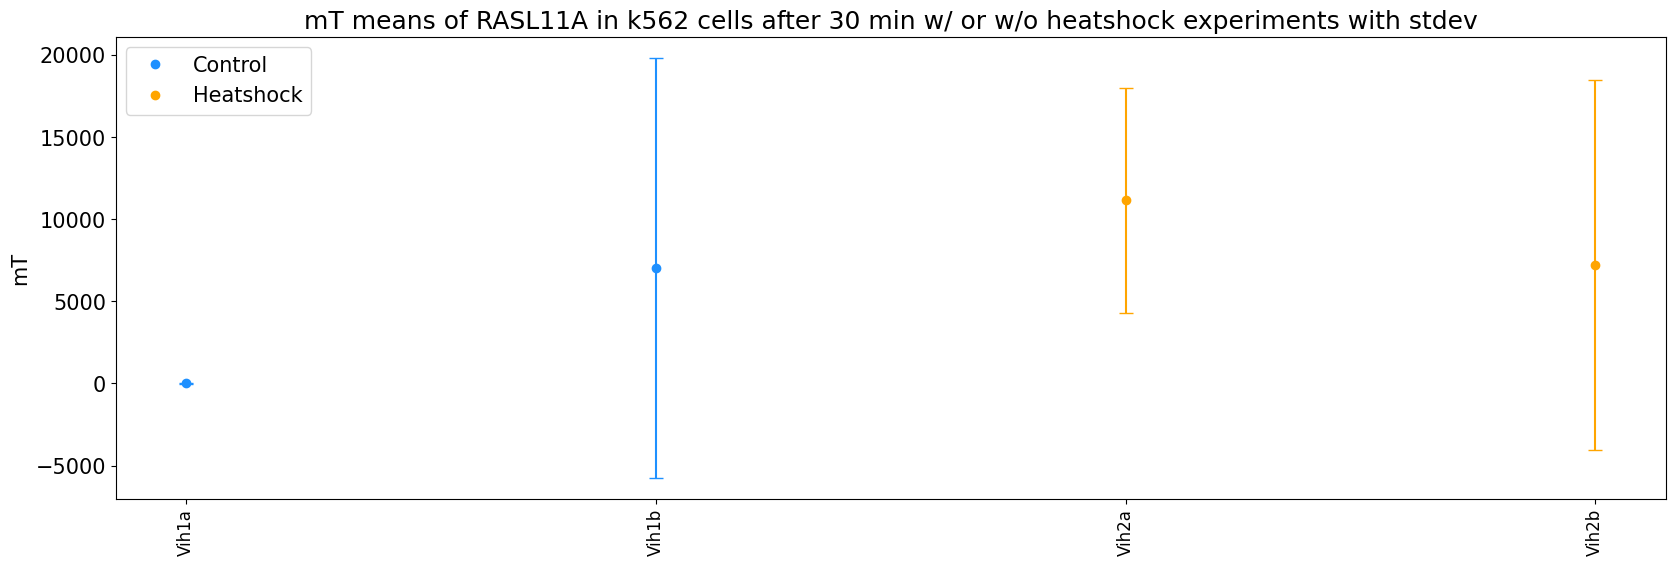

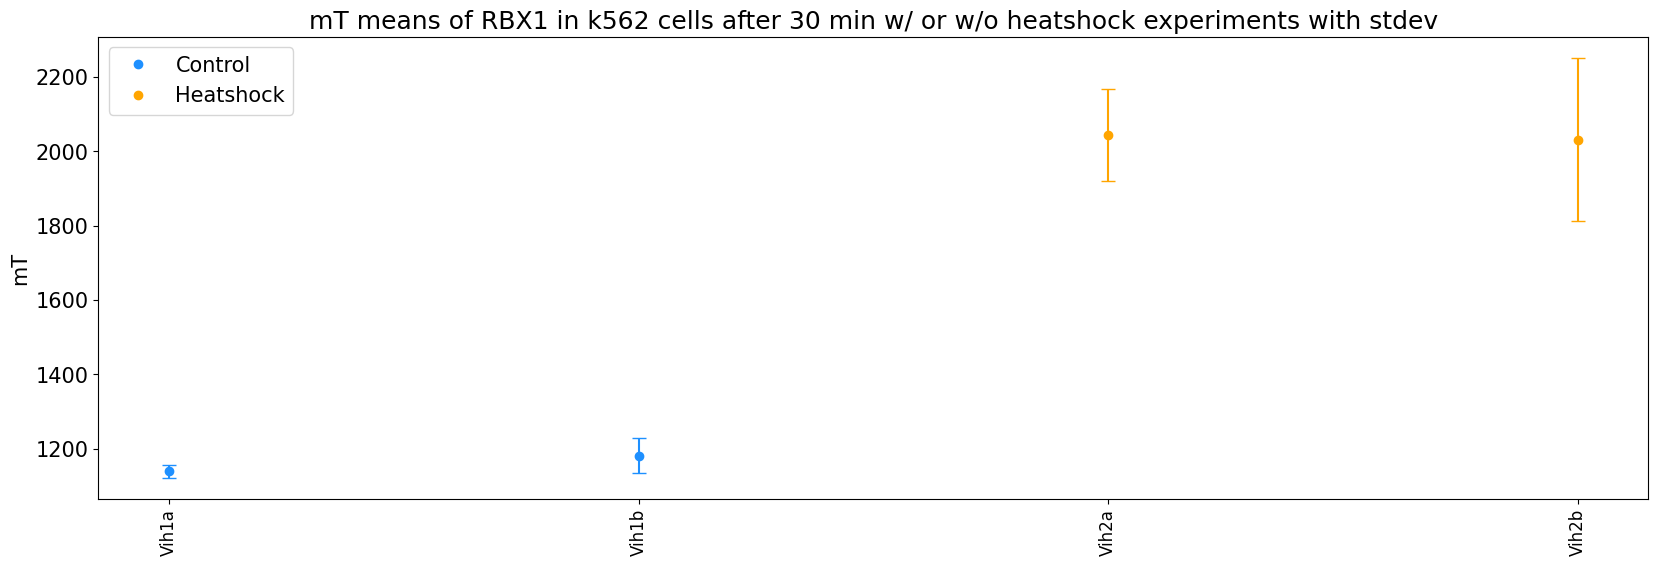

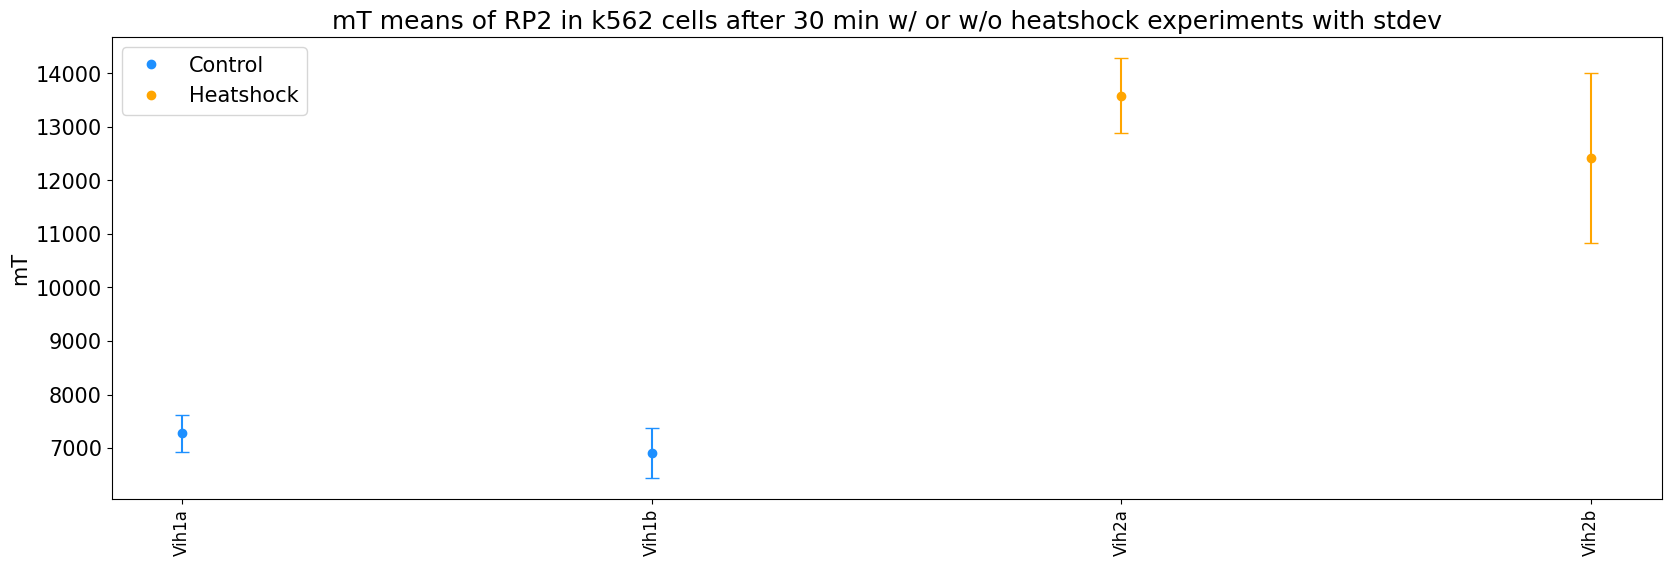

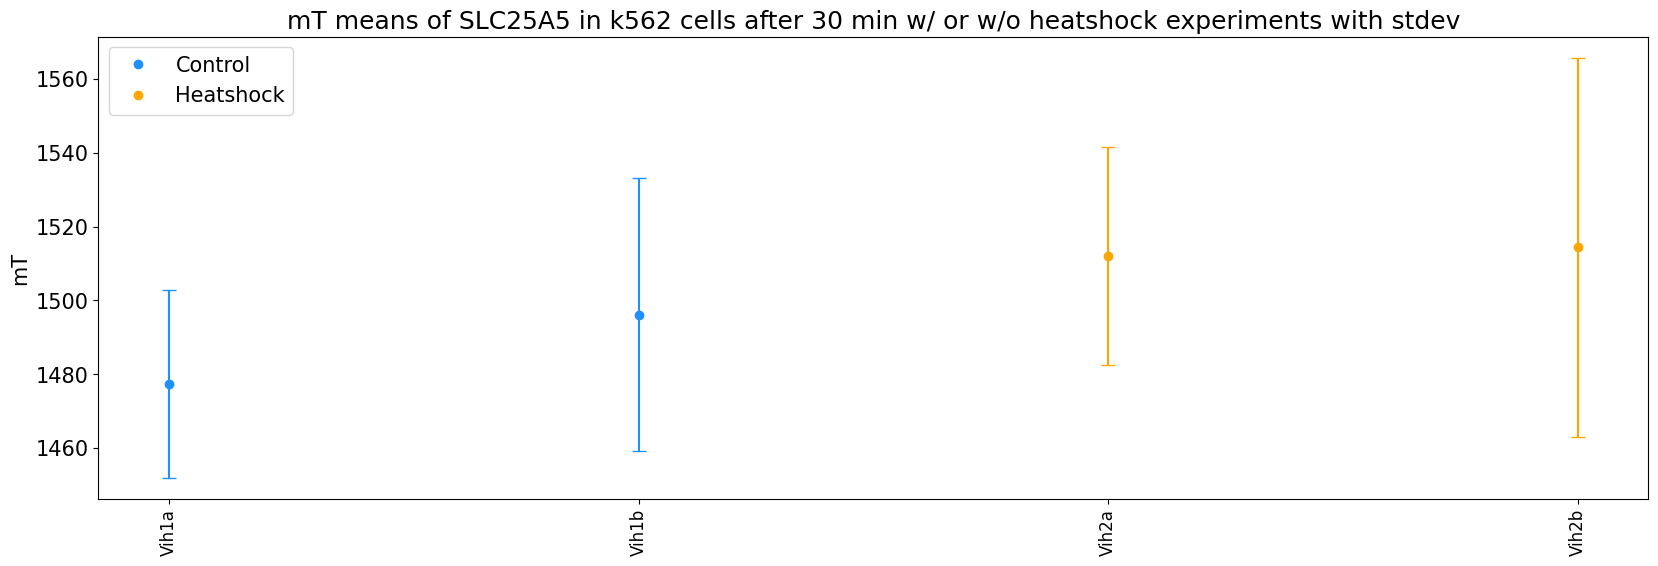

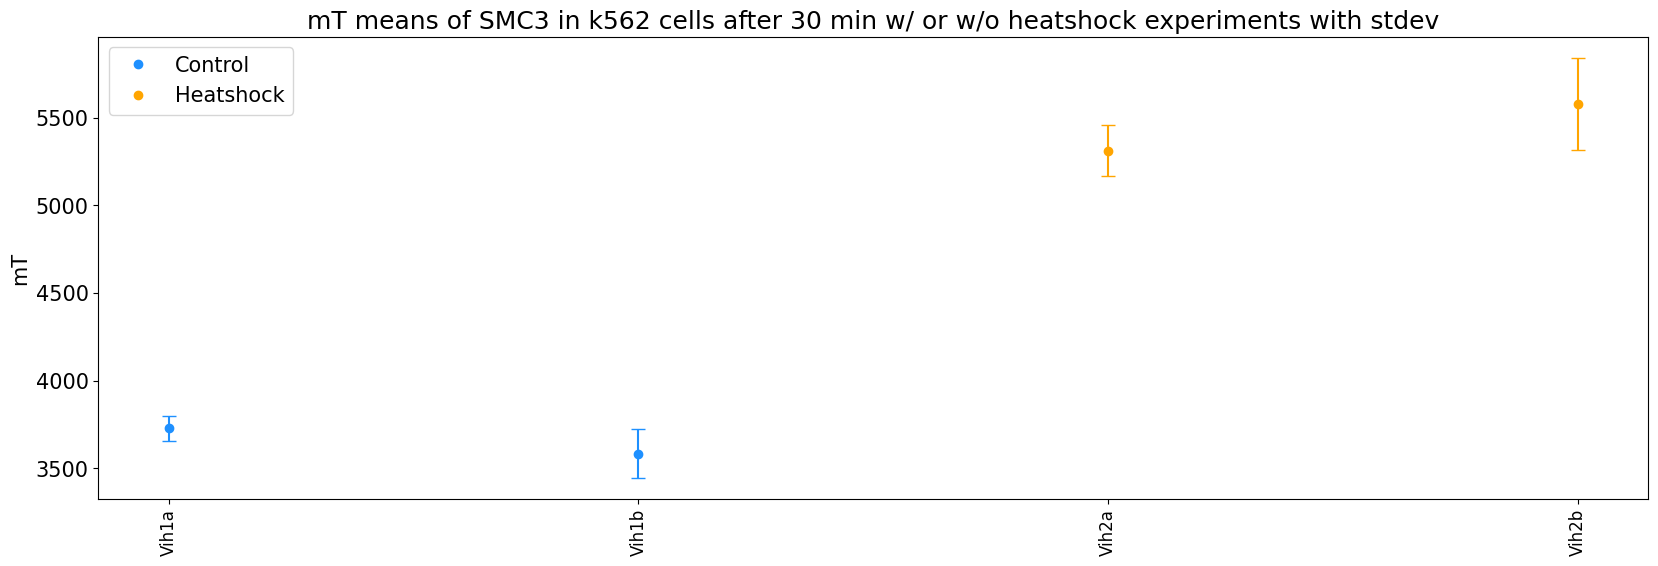

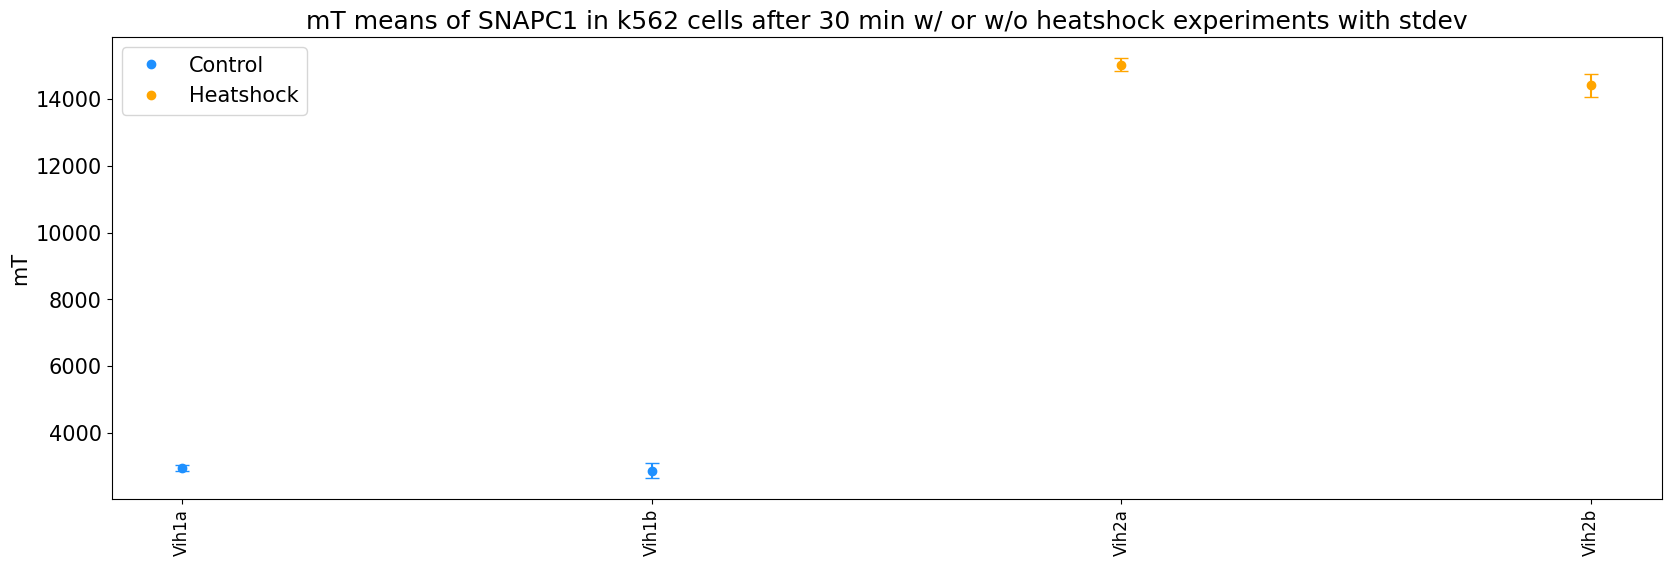

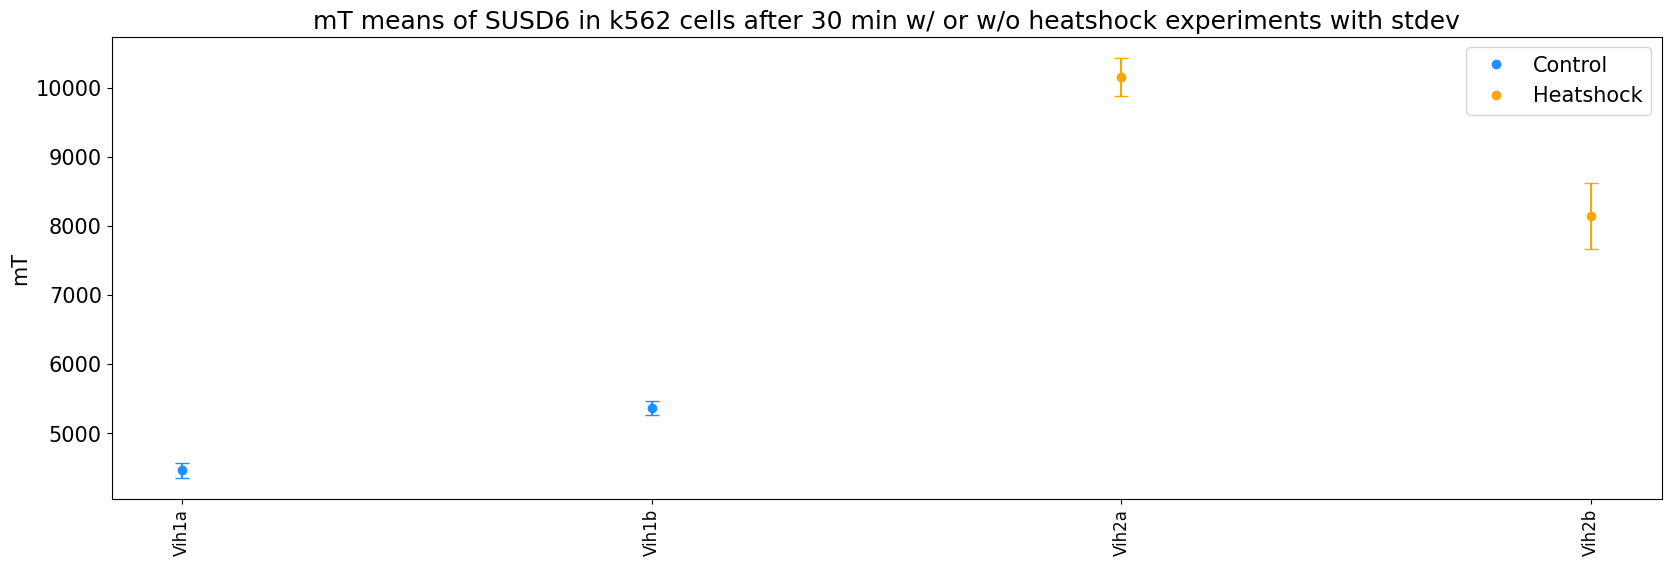

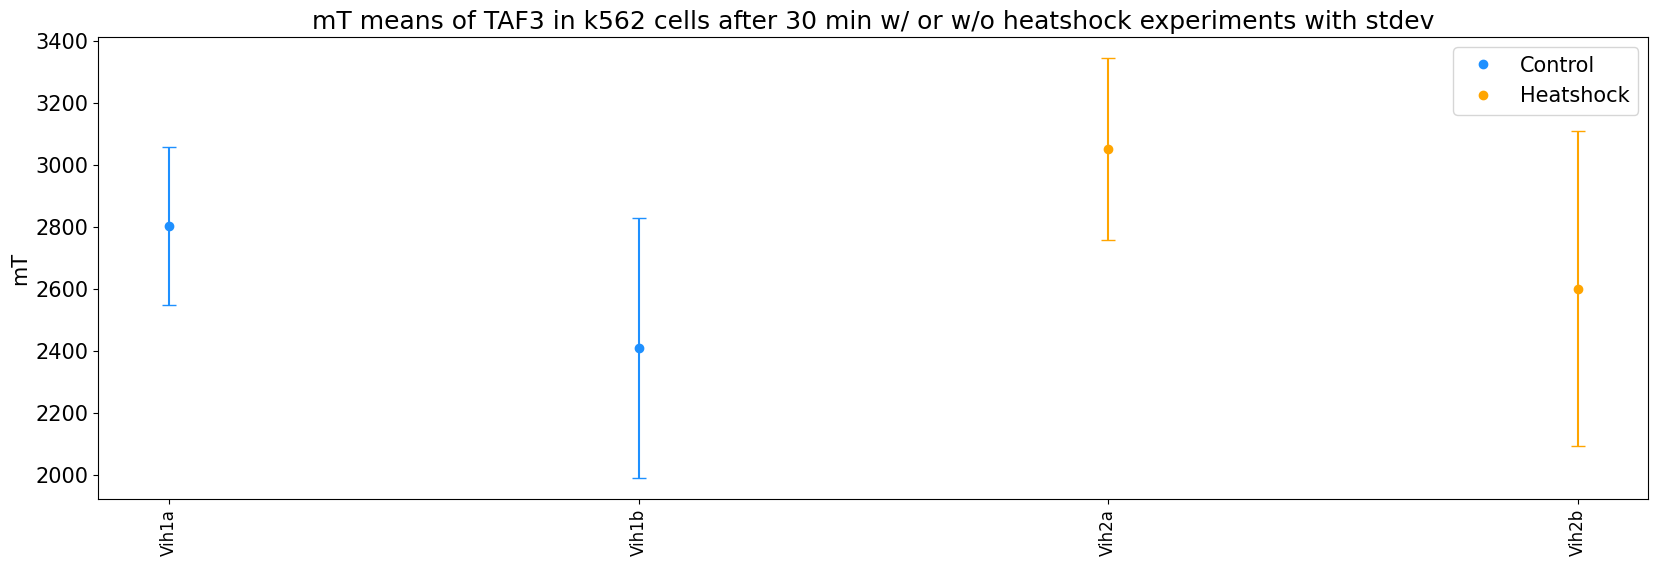

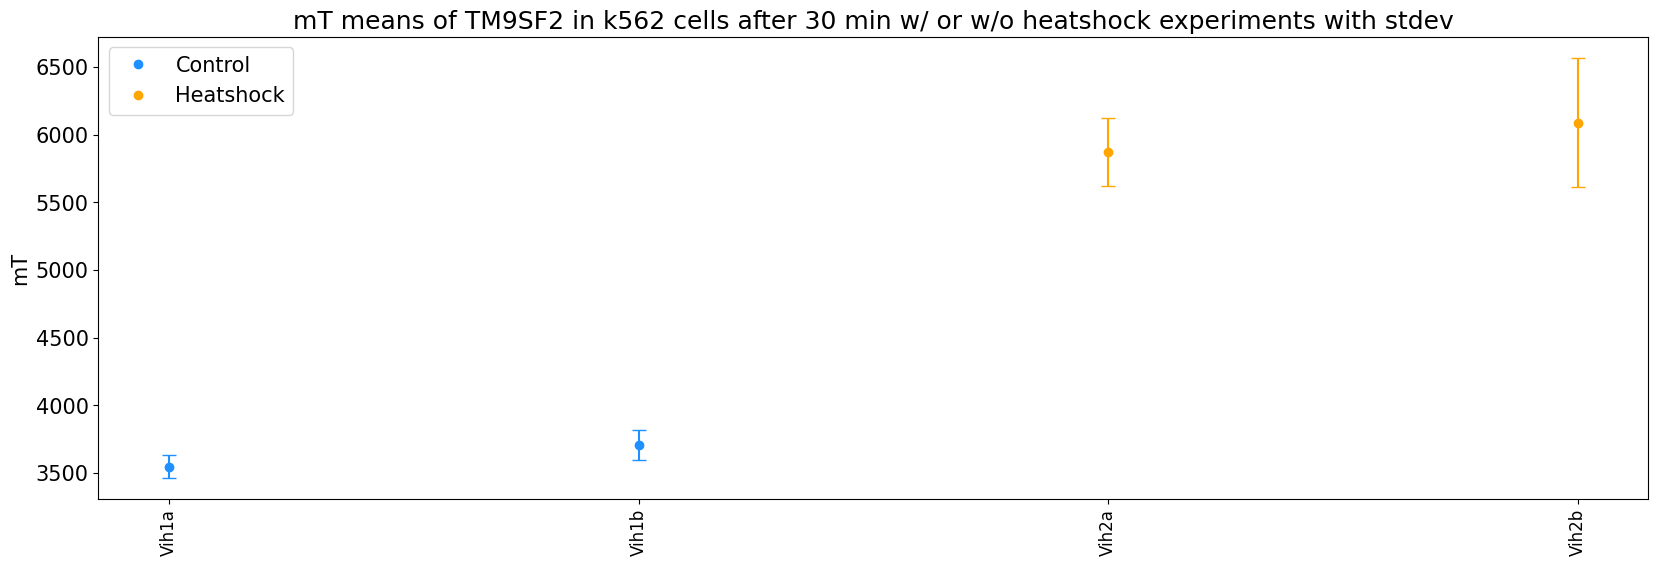

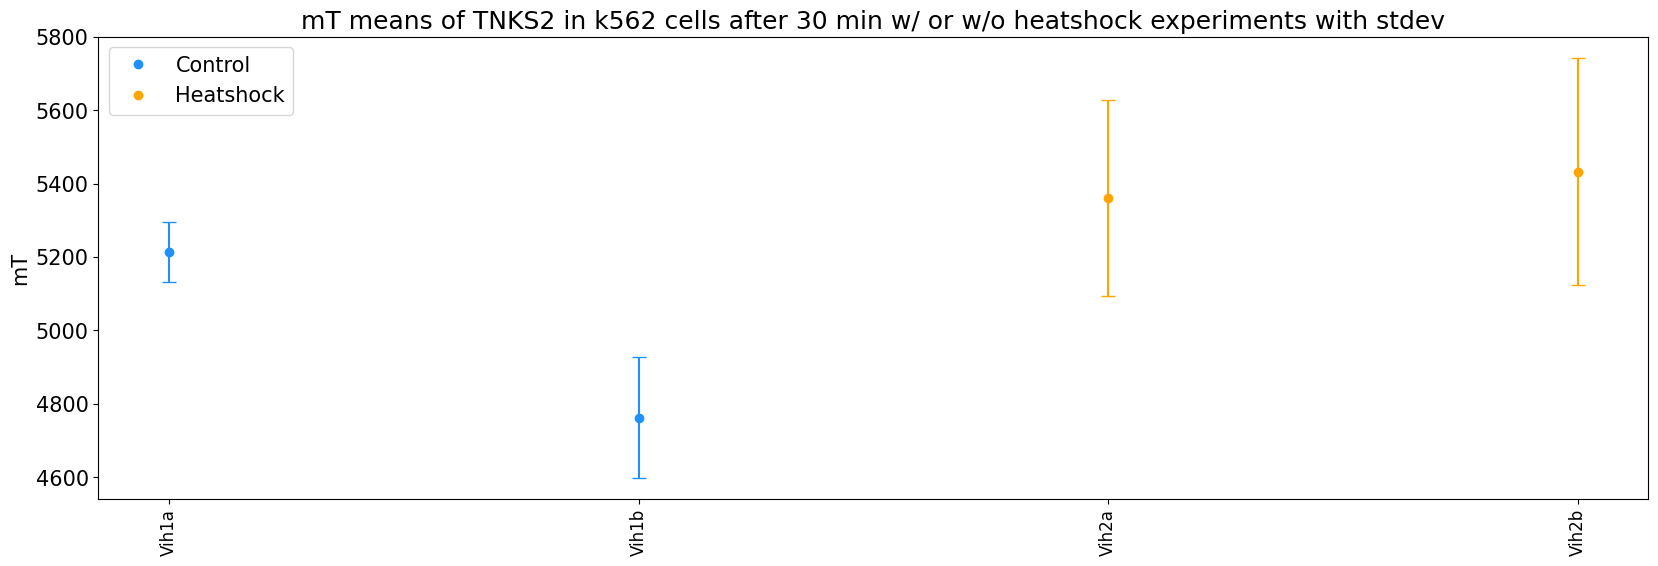

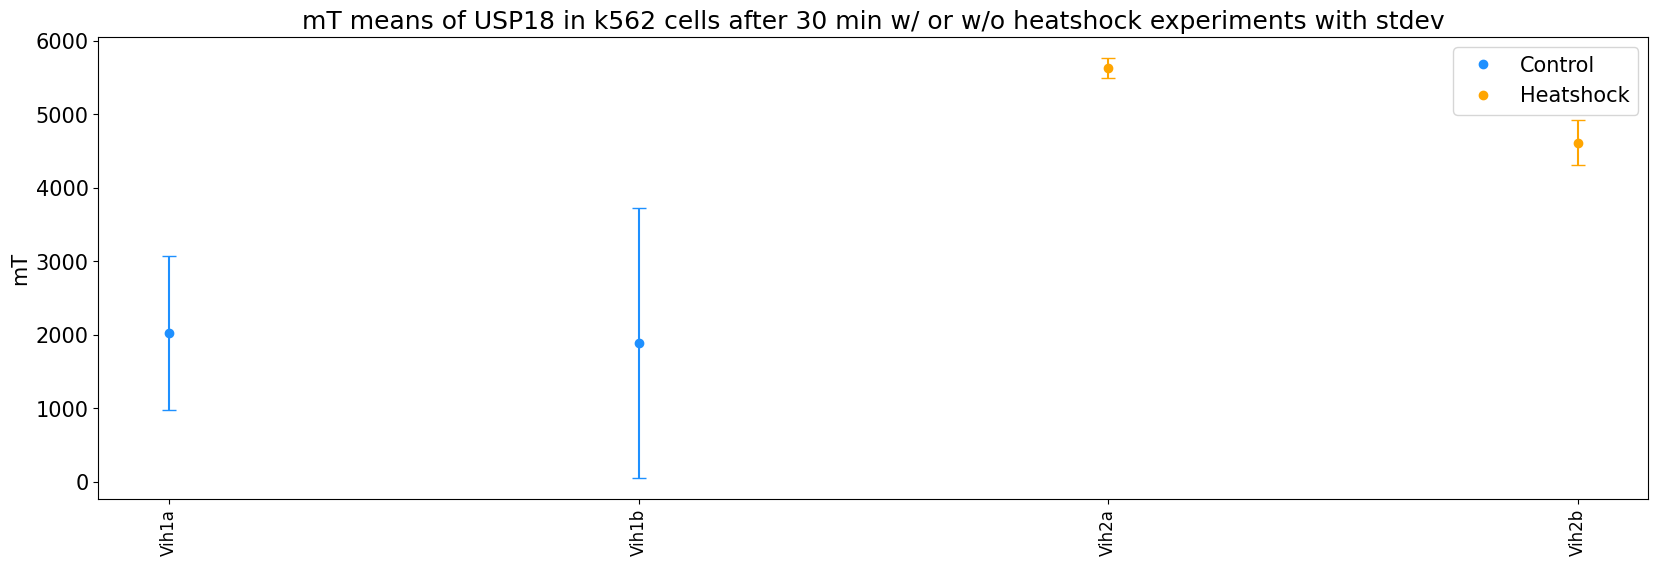

In [32]:
for gene in HShigher_p_df.index:
    pf.meanerror_exp_plotter(full_df=HS30_full_df, gene=gene, par='mT', cats=cats, 
                          group_name='k562 cells after 30 min w/ or w/o heatshock', expline=False)

When looking at only these genes, it seems that only TNKS2 and maybe SUSD6 really had longer transcription. SDE2, TNKS2

In [ ]:
# Plot all genes higher & lower
gene_list = []
for gene in HShigher_df.index: